## Data wrangling and exploration

In [421]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import joblib
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler



In [422]:
# csv file
file_path = '/Users/martinthuren/Desktop/Datamatiker - 4 semester/Business Intelligence/MP4/employee-attrition.csv'

df = pd.read_csv(file_path, header=0)

In [423]:
print(df.head())
print(df.info())
print(df.describe())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [424]:
#Drop missing values
df = df.dropna()

# Remove duplicates
df = df.drop_duplicates()

In [425]:
# Feature selection
target_variable = 'Attrition'
features = df.drop(columns=[target_variable])

In [426]:
features_encoded = pd.get_dummies(features)

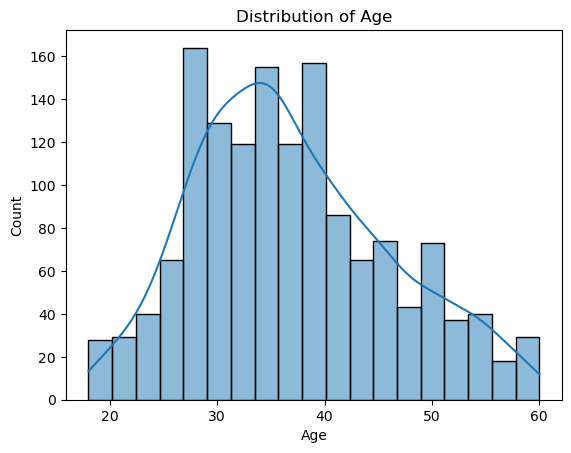

In [427]:
# Data analysis
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

In [428]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, df[target_variable], test_size=0.2, random_state=42)

In [429]:
# machine learning model Logistic Regression
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [430]:
# Make predictions on the test set
predictions = model.predict(X_test)

In [431]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.891156462585034


In [432]:
# Save the trained model
joblib.dump(model, 'logistic_regression_model.pkl')

print('Model saved successfully.')

Model saved successfully.


## Supervised machine learning: classification

In [433]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, df[target_variable], test_size=0.2, random_state=42)

In [434]:
# Train and evaluate Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
dt_predictions = decision_tree_model.predict(X_test)

In [435]:
# Evaluate Decision Tree model
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)
print("Classification Report for Decision Tree:")
print(classification_report(y_test, dt_predictions))

Decision Tree Accuracy: 0.7789115646258503
Classification Report for Decision Tree:
              precision    recall  f1-score   support

          No       0.88      0.86      0.87       255
         Yes       0.20      0.23      0.22        39

    accuracy                           0.78       294
   macro avg       0.54      0.55      0.54       294
weighted avg       0.79      0.78      0.78       294



In [436]:
# Train and evaluate Naïve Bayes model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
nb_predictions = naive_bayes_model.predict(X_test)

In [437]:
# Evaluate Naïve Bayes model
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("\nNaïve Bayes Accuracy:", nb_accuracy)
print("Classification Report for Naïve Bayes:")
print(classification_report(y_test, nb_predictions))


Naïve Bayes Accuracy: 0.7721088435374149
Classification Report for Naïve Bayes:
              precision    recall  f1-score   support

          No       0.92      0.80      0.86       255
         Yes       0.31      0.56      0.40        39

    accuracy                           0.77       294
   macro avg       0.61      0.68      0.63       294
weighted avg       0.84      0.77      0.80       294



In [438]:
# model with the highest accuracy
if dt_accuracy > nb_accuracy:
    recommended_model = "Decision Tree"
else:
    recommended_model = "Naïve Bayes"

print("\nRecommended Model:", recommended_model)


Recommended Model: Decision Tree


## Unsupervised machine learning: clustering

In [439]:
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features_encoded)

In [440]:
# applying K-Means clustering with different cluster configurations
max_clusters = 10  
best_silhouette_score = -1  

In [441]:
for n_clusters in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(features_standardized)
    silhouette_avg = silhouette_score(features_standardized, labels)
    
    print(f'Number of clusters: {n_clusters}, Silhouette Score: {silhouette_avg}')

    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_n_clusters = n_clusters
        best_kmeans_model = kmeans

print("\nBest Cluster Configuration:")
print(f'Number of clusters: {best_n_clusters}, Silhouette Score: {best_silhouette_score}')


/Users/martinthuren/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 2, Silhouette Score: 0.10629682804860625


/Users/martinthuren/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 3, Silhouette Score: 0.07920346107624013


/Users/martinthuren/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 4, Silhouette Score: 0.07504590461373561


/Users/martinthuren/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 5, Silhouette Score: 0.05940594834522969


/Users/martinthuren/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 6, Silhouette Score: 0.09487284778825579


/Users/martinthuren/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 7, Silhouette Score: 0.09270308940592639


/Users/martinthuren/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 8, Silhouette Score: 0.10469346798365685


/Users/martinthuren/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 9, Silhouette Score: 0.11526092725689009


/Users/martinthuren/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 10, Silhouette Score: 0.09870636701818405

Best Cluster Configuration:
Number of clusters: 9, Silhouette Score: 0.11526092725689009


In [442]:
# Assigning cluster labels to the original dataset
df['Cluster_Labels'] = best_kmeans_model.predict(features_standardized)

In [443]:
# Explore the clusters, excluding non-numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
cluster_means = df.groupby('Cluster_Labels')[numeric_columns].mean()
print("\nCluster Means:")
print(cluster_means)


Cluster Means:
                      Age   DailyRate  DistanceFromHome  Education  \
Cluster_Labels                                                       
0               44.000000  802.450000          8.437500   3.125000   
1               39.809160  854.251908          9.786260   2.992366   
2               36.824615  802.467692          9.658462   3.012308   
3               38.296552  796.020690          9.482759   2.896552   
4               46.873786  781.970874          8.048544   3.029126   
5               34.096525  796.617761          9.409266   2.772201   
6               30.361446  811.349398          8.662651   2.530120   
7               34.236301  800.359589          9.013699   2.914384   
8               35.500000  757.923077          8.173077   2.884615   

                EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  \
Cluster_Labels                                                           
0                         1.0      989.787500                 2.5

## Machine Learning application

In [444]:
# ?

## Analyzing why people may leave their job

In [445]:
target_variable = 'Attrition'

In [446]:
# Separate features and target variable
X = df.drop(columns=[target_variable])
y = df[target_variable]

In [447]:
# One-hot encode categorical variables
X_encoded = pd.get_dummies(X)

In [448]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [449]:
# Standardize the features
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

In [450]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_standardized, y_train)

LogisticRegression()

In [451]:
# Create a DataFrame to display feature names and their corresponding coefficients
coefficients_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Coefficient': model.coef_[0]
})

In [452]:
# Sort the DataFrame by descending order
coefficients_df['Absolute Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)


In [453]:
# Display the top features contributing to attrition
top_features = coefficients_df[['Feature', 'Coefficient']].head(10)
print("Top Features Contributing to Attrition:")
print(top_features)

Top Features Contributing to Attrition:
                      Feature  Coefficient
22             YearsAtCompany     0.683783
23         YearsInCurrentRole    -0.655445
13         NumCompaniesWorked     0.505497
24    YearsSinceLastPromotion     0.503177
54                OverTime_No    -0.490742
55               OverTime_Yes     0.490742
25       YearsWithCurrManager    -0.472199
19          TotalWorkingYears    -0.455685
10            JobSatisfaction    -0.439129
46  JobRole_Research Director    -0.420974


## Work positions and departments that are at a higher risk of losing employees

In [454]:
target_variable = 'Attrition'

In [455]:
# Separate features and target variable
X = df.drop(columns=[target_variable])
y = df[target_variable]

In [456]:
# One-hot encode categorical variables
X_encoded = pd.get_dummies(X)

In [457]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [458]:
# Standardize the features
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

In [459]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_standardized, y_train)

LogisticRegression()

In [460]:
# Create a DataFrame to display feature names and their corresponding coefficients
coefficients_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Coefficient': model.coef_[0]
})

In [461]:
# Sort the DataFrame by descending order
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)


In [462]:
# Display the top features contributing to attrition
top_features = coefficients_df[['Feature', 'Coefficient']].head(10)
print("Top Features Contributing to Attrition:")
print(top_features)

Top Features Contributing to Attrition:
                             Feature  Coefficient
22                    YearsAtCompany     0.683783
13                NumCompaniesWorked     0.505497
24           YearsSinceLastPromotion     0.503177
55                      OverTime_Yes     0.490742
52              MaritalStatus_Single     0.352562
43     JobRole_Laboratory Technician     0.350732
2                   DistanceFromHome     0.346233
42           JobRole_Human Resources     0.311889
28  BusinessTravel_Travel_Frequently     0.297989
26                    Cluster_Labels     0.283850


In [463]:
# Extract work positions and departments
work_positions = df['JobRole'].unique()
departments = df['Department'].unique()

In [464]:
# Calculate the risk for each work position and department
risk_dict = {}
for position in work_positions:
    risk_dict[position] = np.sum(coefficients_df.loc[coefficients_df['Feature'].str.contains(position)]['Coefficient'])

for department in departments:
    risk_dict[department] = np.sum(coefficients_df.loc[coefficients_df['Feature'].str.contains(department)]['Coefficient'])


In [465]:
# Sort the dictionary by risk in descending order
sorted_risk_dict = dict(sorted(risk_dict.items(), key=lambda item: item[1], reverse=True))


In [466]:
# Display the risk for each work position and department
print("\nRisk of Attrition by Work Position and Department:")
for key, value in sorted_risk_dict.items():
    print(f"{key}: {value}")


Risk of Attrition by Work Position and Department:
Sales: 0.5355338409512426
Laboratory Technician: 0.3507319328299821
Sales Representative: 0.2559837135177366
Sales Executive: 0.15074641182287235
Human Resources: 0.1046415462277977
Research & Development: -0.00016147846393303132
Manufacturing Director: -0.10202422921894971
Research Scientist: -0.16024513735024856
Healthcare Representative: -0.25153067439521754
Research Director: -0.42097440216864673
Manager: -0.6765702700694726


## Checking to see if genders are paid equally in all departments

In [467]:
from scipy.stats import ttest_ind

In [468]:
# Extract relevant columns for analysis
pay_data = df[['Gender', 'Department', 'MonthlyIncome']]

In [469]:
# Separate data for each gender
male_pay = pay_data[pay_data['Gender'] == 'Male']['MonthlyIncome']
female_pay = pay_data[pay_data['Gender'] == 'Female']['MonthlyIncome']


In [470]:
# Perform t-test for each department
departments = pay_data['Department'].unique()
for department in departments:
    male_pay_department = male_pay[pay_data['Department'] == department]
    female_pay_department = female_pay[pay_data['Department'] == department]

     # Perform t-test
    t_stat, p_value = ttest_ind(male_pay_department, female_pay_department)
    
      # Print results
    print(f"Are employees in the '{department}' department paid equally?")
    if p_value < 0.05:
        print("No, there is a significant difference in pay.")
    else:
        print("Yes, there is no significant difference in pay.")
    print("")
    

Are employees in the 'Sales' department paid equally?
Yes, there is no significant difference in pay.

Are employees in the 'Research & Development' department paid equally?
Yes, there is no significant difference in pay.

Are employees in the 'Human Resources' department paid equally?
Yes, there is no significant difference in pay.



## Do family status and the distance from work influence work-life balance?

In [471]:
# Extract relevant columns for analysis
work_life_data = df[['MaritalStatus', 'DistanceFromHome', 'WorkLifeBalance']]


In [472]:
# Perform t-test for each combination of family status and distance from work
marital_statuses = work_life_data['MaritalStatus'].unique()
distances = work_life_data['DistanceFromHome'].unique()

for marital_status in marital_statuses:
    for distance in distances:
        work_life_marital = work_life_data[(work_life_data['MaritalStatus'] == marital_status) & (work_life_data['DistanceFromHome'] == distance)]['WorkLifeBalance']
        work_life_single = work_life_data[(work_life_data['MaritalStatus'] == 'Single') & (work_life_data['DistanceFromHome'] == distance)]['WorkLifeBalance']
        
        # Perform t-test
        t_stat, p_value = ttest_ind(work_life_marital, work_life_single)

        # Print results
        print(f"Does family status '{marital_status}' and distance from work '{distance}' influence work-life balance?")
        if p_value < 0.05:
            print("Yes, there is a significant difference in work-life balance.")
        else:
            print("No, there is no significant difference in work-life balance.")
        print("")
        

Does family status 'Single' and distance from work '1' influence work-life balance?
No, there is no significant difference in work-life balance.

Does family status 'Single' and distance from work '8' influence work-life balance?
No, there is no significant difference in work-life balance.

Does family status 'Single' and distance from work '2' influence work-life balance?
No, there is no significant difference in work-life balance.

Does family status 'Single' and distance from work '3' influence work-life balance?
No, there is no significant difference in work-life balance.

Does family status 'Single' and distance from work '24' influence work-life balance?
No, there is no significant difference in work-life balance.

Does family status 'Single' and distance from work '23' influence work-life balance?
No, there is no significant difference in work-life balance.

Does family status 'Single' and distance from work '27' influence work-life balance?
No, there is no significant differenc

/Users/martinthuren/anaconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


## Does education make people happy (satisfied with the work)?

In [473]:
education_satisfaction_data = df[['Education', 'JobSatisfaction']]

In [474]:
# Group by education level and calculate average job satisfaction
average_satisfaction_by_education = education_satisfaction_data.groupby('Education')['JobSatisfaction'].mean()


In [475]:
# Print the results
print(average_satisfaction_by_education)

Education
1    2.800000
2    2.769504
3    2.652098
4    2.786432
5    2.666667
Name: JobSatisfaction, dtype: float64
